# Polynomial Regression

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the datataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
# We need only the Level column and salary column
# Level as predictor and the salary as the Target variable
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

###### No need to split -The whole data is taken as Training set

## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
# Predict the target
y_pred = lin_reg.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

### Visualizing the Linear Regression results

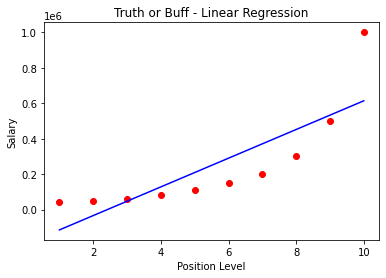

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color= 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Buff - Linear Regression')
plt.show()

### Training the Polynomial Regression model on the whole dataset

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [17]:
# Fit the 2nd degree polynomial in to the linear regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [19]:
# Predict the polynomial regression results
y_pred_poly = lin_reg_2.predict(X_poly)
y_pred_poly

array([118727.27272727,  44151.51515152,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

### Visualizing  the Polynomial Regression results

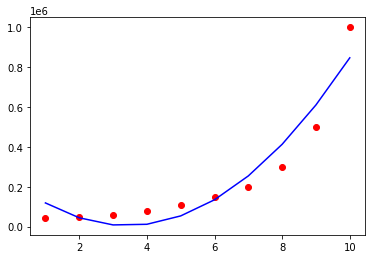

In [20]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_poly, color = 'blue')

##### This is not much fit - not a good model. Inorder to get the best fit model, increase the degree of polynomial from 2 to 4

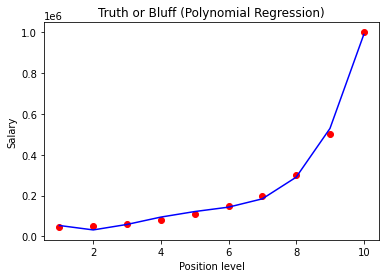

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_poly = lin_reg_2.predict(X_poly)
# Visualise the incresed degree model
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_poly, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

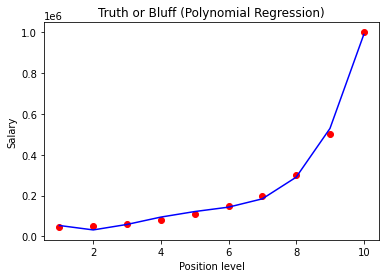

In [26]:
# To get smoother curve - increase the resolution by decreasing the grids
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_poly, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

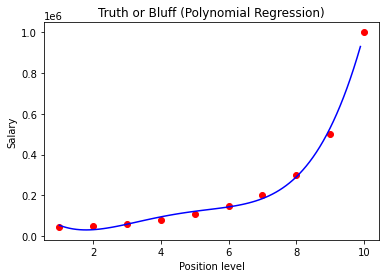

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with Linear Regression

In [28]:
lin_reg.predict([[6.5]])

array([330378.78787879])

The Predicted value for 6.5 level is 330k.
The salary for level 6 is 150k and the salary for level 7 is 200k. So the predicted value is wrong. 
To avoid the error, move with polynomial regression

### Predicting a new result with Polynomial Regression

In [29]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))                                                                              

array([158862.45265153])

The Predicted value for 6.5 level is 158k